# GMM-Based Synthetic Sampling for Imbalanced Data

> Submitted by Sanved Bangale (DA25M027)

## A. Baseline Model and Data Analysis

### Data Loading and Analysis

In [1]:
import pandas as pd
import numpy as np

RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

In [2]:
try:
    data = pd.read_csv('./creditcard.csv')
    print(f'loaded data')
except Exception:
    print(f'error encountered...')

loaded data


In [3]:
data.shape, data.columns

((284807, 31),
 Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
        'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
        'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
        'Class'],
       dtype='object'))

In [4]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


The dataset has 284807 data points. \
The values are numeric, which are the result of a PCA transformation. \
Features V1, ..., V28 are PCA-transformed. Amount and Time are not. 

- Time: Seconds elapsed between each transaction and the first transaction in the dataset. 
- Amount: Transaction amount. 

Feature class: Fraud (1: Fraud, 0: Legit)

The dataset has no missing values. \
The dataset is pre-processed using PCA, so no feature engineering is required. 

The stats show that PCA features are centered around 0 with varying ranges. \
This is due to dimensionality reduction. 

The mean is 0.0017 for class. This means that less than 0.2% data points are for fraud transactions. \
This indicates high imbalance. 

In [7]:
import matplotlib.pyplot as plt

In [8]:
class_counts = data['Class'].value_counts()
print(f'Class distribution: {class_counts}')

Class distribution: Class
0    284315
1       492
Name: count, dtype: int64


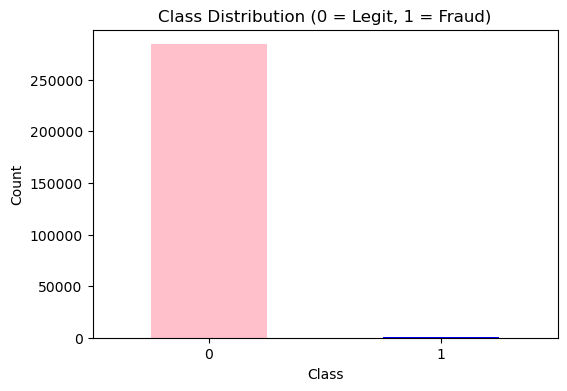

In [9]:
plt.figure(figsize=(6,4))
class_counts.plot(kind='bar', color=['pink', 'blue'])
plt.title("Class Distribution (0 = Legit, 1 = Fraud)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

The data is extremely imbalanced. 
- 2,84,315 points are legitimate, 492 are fraud
- so 0.17% of the data is fraud, which is quite low
- the visuals show the skew really well 

This will cause problems for classification. 

### Model Training

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X = data.drop("Class", axis=1)
y = data["Class"]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=RANDOM_STATE
)

I've done an 80/20 split with stratify=y to make sure that the imbalance is preserved in the test set as well. 

In [13]:
print(f'training set class distribution:\n\n {y_train.value_counts()}')
print(f'test set class distribution:\n\n {y_test.value_counts()}')

training set class distribution:

 Class
0    227451
1       394
Name: count, dtype: int64
test set class distribution:

 Class
0    56864
1       98
Name: count, dtype: int64


The class distribution is preserved in the train set and the test set both. 

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
log_reg = LogisticRegression(max_iter=5000, solver='liblinear', random_state=RANDOM_STATE)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=5000, random_state=42, solver='liblinear')

In [16]:
y_pred = log_reg.predict(X_test)
y_pred_prob = log_reg.predict_proba(X_test)[:, 1]

I've trained the baseline model.

### Baseline Evaluation

Because of the imbalance in the data set, we can expect the decision boundary to lean towards 'legit', i.e. it'll probably predict most of the samples not fraud. 

In [17]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score

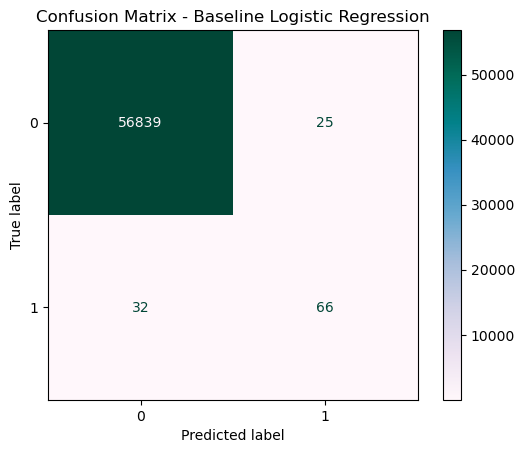

In [18]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_reg.classes_)
disp.plot(cmap='PuBuGn')
plt.title(f'Confusion Matrix - Baseline Logistic Regression')
plt.show()

In [19]:
confusion_matrix(y_test, y_pred)

array([[56839,    25],
       [   32,    66]])

In [75]:
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print('\nClassification Report (focus on Class=1, i.e. Fraud):\n')
baseline_rep = classification_report(y_test, y_pred, digits=4)
print(f'{baseline_rep}')

Accuracy: 0.9989993328885924

Classification Report (focus on Class=1, i.e. Fraud):

              precision    recall  f1-score   support

           0     0.9994    0.9996    0.9995     56864
           1     0.7253    0.6735    0.6984        98

    accuracy                         0.9990     56962
   macro avg     0.8624    0.8365    0.8490     56962
weighted avg     0.9990    0.9990    0.9990     56962



The accuracy is nearly 0.9989, which is a bit too high. This is quite misleading due to the class imbalance in the data. \
Only 98 out of 56962 transactions are fraud, so accuracy basically depended on the correctly classified legit transactions. \
And those would be high because the model would tend to predict a transaction as not fraud due to the imbalance in the training data. 

Other metrics: \
Model only correctly classified 66 frauds, missed 32, so recall is 0.67 for the fraud class. It is very high for the non-fraud class since a high proportion of the non-fraud transactions were correctly classified. \
Precision is around 0.725, which means around 1/4 predictions of fraud were false positives. \
f-1 score is about 0.69 for the fraud class. Indicates a moderate balance between precision and recall. \
\
Conclusion from this: 
All the metrics are quite high for the non-fraud class, lower for the fraud class. \
Accuracy is quite misleading. Precision, recall, f1-score are better indicators of the model performance in this case. 

All of this is due to heavy imbalance in the data. 

## B. GMM for Synthetic Sampling

### Theory

**Difference between SMOTE and GMM:**

SMOTE: Synthetic Minority Oversampling Technique \
SMOTE picks existing minority class points and their nearest neighbors. It interpolates between those points to get new points. \
SMOTE makes an assumption that the minority class data is uniformly distributed in the sample space. \
This can create noisy samples. \
It might even create samples in regions where the actual data is sparse, as it doesn't capture enough information about the class distribution. 

GMM: Gaussian Mixture Models \
GMMs, on the other hand, take a more probabilistic approach. \
They model class distribution of minority classes as aggregate of multiple Gaussians. \
The model can then capture complex cluster information as weighted sum of Gaussians. \
Theoretically, Gaussians can capture any kind of distributions when aggregated. 

| SMOTE                                                    | GMM                                                     |
|----------------------------------------------------------|---------------------------------------------------------|
| interpolates between minority pts and their nearest neighbors | models minority distribution as a mixture of Gaussians  |
| assumes minority data is uniformly distributed in feature space | Minority data follows a probabilistic distribution      |
| simple, fast, widely used                                | captures complex clusters and sub-groups in the data    |
| can generate noisy or unrealistic samples in sparse regions | requires careful choice of number of components; risk of overfitting |


**GMM is theoretically better at capturing the underlying data distribution, especially when the minority class has multiple sub-groups or complex shapes in the feature space.**

This is because it does not assume that the data is uniformly spread in the minority class. \
It models the data as weighted combination of Gaussians. Each Gaussian represents a sub-group. \
This allows GMMs to capture multimodal structures in the sample space. \


### GMM 

GMM assumes data comes from a mixture of $k$ Gaussians. 

Need to find $k$. \
I'll plot AIC and BIC values for diff $k$'s. 

In [21]:
from sklearn.mixture import GaussianMixture

In [22]:
X_train_minority = X_train[y_train == 1]

In [23]:
n_components = range(1, 11)  
aic = []
bic = []

In [24]:
for k in n_components:
    gmm = GaussianMixture(n_components=k, random_state=RANDOM_STATE)
    gmm.fit(X_train_minority)
    aic.append(gmm.aic(X_train_minority))
    bic.append(gmm.bic(X_train_minority))

In [25]:
sum_aic_bic = []
for aic_, bic_ in zip(aic, bic):
    sum_aic_bic.append(aic_ + bic_)

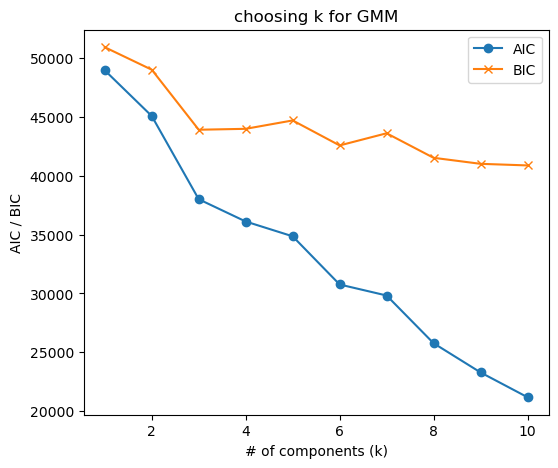

In [26]:
plt.figure(figsize=(6, 5))
plt.plot(n_components, aic, marker='o', label='AIC')
plt.plot(n_components, bic, marker='x', label='BIC')
plt.xlabel("# of components (k)")
plt.ylabel("AIC / BIC")
plt.title("choosing k for GMM")
plt.legend()

plt.show()

AIC keeps steadily decreasing as k increases. \
AIC keeps going down. AIC usually favors more complex models. \
BIC decreases around 3-4, then is more or less stable. \
BIC suggests an optimal value of ~3. Higher values may possibly capture extra structure in the data. \
But the largest reduction occurs by $k = 3$. \
So I'll go with 3. 

$k = 3$ seems a good enough choice to balance model complexity and capturing unnecessary noise. 

In [27]:
gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=RANDOM_STATE)
gmm.fit(X_train_minority)

GaussianMixture(n_components=3, random_state=42)

In [28]:
print(f'AIC: {gmm.aic(X_train_minority)}')
print(f'BIC: {gmm.bic(X_train_minority)}')

AIC: 38010.89616422072
BIC: 43923.72996634675


We can visualize these gmm clusters by projecting the data into 2-d.

In [29]:
from sklearn.decomposition import PCA
import matplotlib.patches as patches

In [30]:
pca = PCA(n_components=2)
X_minority_2d = pca.fit_transform(X_train_minority)

gmm_2d = GaussianMixture(n_components=3, covariance_type='full', random_state=RANDOM_STATE)
gmm_2d.fit(X_minority_2d)

GaussianMixture(n_components=3, random_state=42)

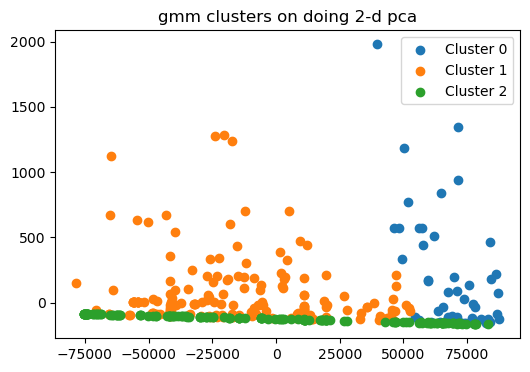

In [31]:
clusters = gmm_2d.predict(X_minority_2d)
plt.figure(figsize=(6,4))
for i in range(3):
    plt.scatter(X_minority_2d[clusters==i,0], X_minority_2d[clusters==i,1], label=f'Cluster {i}')
plt.title("gmm clusters on doing 2-d pca")
plt.legend()
plt.show()

We can see that GMM captures various sub-groups in the data. \
This is a crude 2-d representation, but the original structure should theoretically capture sub-groups much better.

### Synthetic Data Generation

In [32]:
n_minority = X_train[y_train == 1].shape[0]
n_majority = X_train[y_train == 0].shape[0]

n_synthetic = n_majority - n_minority

print(f'n_synthetic: {n_synthetic}')

n_synthetic: 227057


I'll resample # of points as much as the class count difference. 

In [33]:
X_synthetic, labels = gmm.sample(n_synthetic)

X_synthetic = pd.DataFrame(X_synthetic, columns=X_train.columns)
y_synthetic = pd.Series([1]*n_synthetic)

In [34]:
X_train_gmm = pd.concat([X_train, X_synthetic], axis=0).reset_index(drop=True)
y_train_gmm = pd.concat([y_train, y_synthetic], axis=0).reset_index(drop=True)

In [35]:
print(y_train_gmm.value_counts())

0    227451
1    227451
Name: count, dtype: int64


The classes are now balanced. 

I fitted GMM on minority to generate synthetic samples. \
The dataset is balanced without altering the majority class distribution. 

### Rebalancing with CBU

In [56]:
from imblearn.under_sampling import ClusterCentroids

In [58]:
under_sampler = ClusterCentroids(sampling_strategy=0.1, random_state=RANDOM_STATE) 

In [59]:
X_resampled, y_resampled = under_sampler.fit_resample(X_train, y_train)

In [60]:
from collections import Counter

In [61]:
print(f'class distribution after under-sampling: {Counter(y_resampled)}')

class distribution after under-sampling: Counter({0: 3940, 1: 394})


In [62]:
X_minority = X_resampled[y_resampled == 1]
y_minority = y_resampled[y_resampled == 1]

In [63]:
gmm = GaussianMixture(n_components=3, random_state=RANDOM_STATE) 
gmm.fit(X_minority)

GaussianMixture(n_components=3, random_state=42)

In [65]:
n_synthetic_samples = len(X_resampled[y_resampled == 0]) - len(X_minority)
synthetic_samples, _ = gmm.sample(n_synthetic_samples)

In [66]:
X_train_balanced = np.vstack([X_resampled, synthetic_samples])
y_train_balanced = np.hstack([y_resampled, np.ones(n_synthetic_samples)])

I applied clustering-based undersampling on majority to reduce it. \
Then generated samples from minority using GMM.

## C. Evaluation

### Model Training and Evaluation

For the GMM-only dataset:

In [67]:
log_reg_gmm = LogisticRegression(max_iter=5000, solver='liblinear', random_state=RANDOM_STATE)
log_reg_gmm.fit(X_train_gmm, y_train_gmm)

LogisticRegression(max_iter=5000, random_state=42, solver='liblinear')

In [68]:
y_pred_gmm = log_reg_gmm.predict(X_test)
y_pred_prob_gmm = log_reg_gmm.predict_proba(X_test)[:, 1]

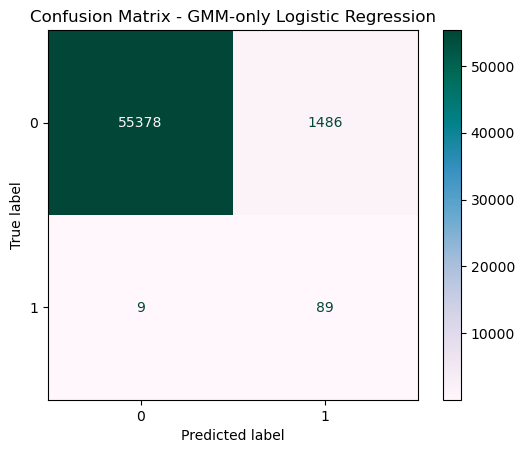

In [69]:
cm_gmm = confusion_matrix(y_test, y_pred_gmm)
disp_gmm = ConfusionMatrixDisplay(confusion_matrix=cm_gmm, display_labels=log_reg_gmm.classes_)
disp_gmm.plot(cmap='PuBuGn')
plt.title('Confusion Matrix - GMM-only Logistic Regression')
plt.show()

In [70]:
report_gmm = classification_report(y_test, y_pred_gmm, target_names=['Majority (0)', 'Minority (1)'])
print(report_gmm)

              precision    recall  f1-score   support

Majority (0)       1.00      0.97      0.99     56864
Minority (1)       0.06      0.91      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.94      0.55     56962
weighted avg       1.00      0.97      0.99     56962



For the CBU+GMM dataset:

In [71]:
log_reg_balanced = LogisticRegression(max_iter=5000, solver='liblinear', random_state=RANDOM_STATE)
log_reg_balanced.fit(X_train_balanced, y_train_balanced)

LogisticRegression(max_iter=5000, random_state=42, solver='liblinear')

In [72]:
y_pred_balanced = log_reg_balanced.predict(X_test)
y_pred_prob_balanced = log_reg_balanced.predict_proba(X_test)[:, 1]

/home/sanved/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/home/sanved/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


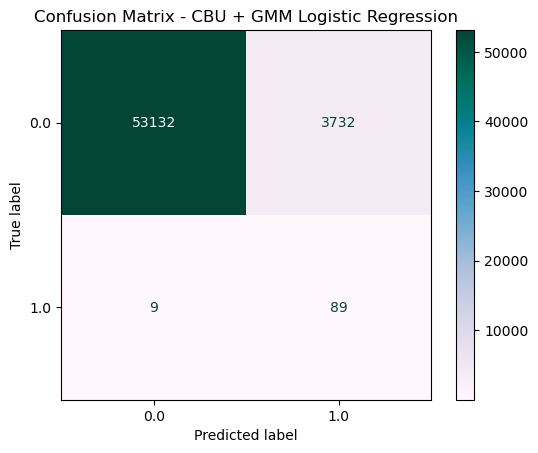

In [73]:
cm_balanced = confusion_matrix(y_test, y_pred_balanced)
disp_balanced = ConfusionMatrixDisplay(confusion_matrix=cm_balanced, display_labels=log_reg_balanced.classes_)
disp_balanced.plot(cmap='PuBuGn')
plt.title('Confusion Matrix - CBU + GMM Logistic Regression')
plt.show()

In [74]:
report_balanced = classification_report(y_test, y_pred_balanced, target_names=['Majority (0)', 'Minority (1)'])
print(report_balanced)

              precision    recall  f1-score   support

Majority (0)       1.00      0.93      0.97     56864
Minority (1)       0.02      0.91      0.05        98

    accuracy                           0.93     56962
   macro avg       0.51      0.92      0.51     56962
weighted avg       1.00      0.93      0.96     56962



The results are pretty good.

### Comparative Analysis

In [89]:
labels = ['Precision', 'Recall', 'F1-Score']
baseline_values = [0.7253, 0.6735, 0.6984]  
gmm_values = [0.06, 0.91, 0.11]  
balanced_values = [0.02, 0.91, 0.05]  

In [90]:
x = np.arange(len(labels))
width = 0.2

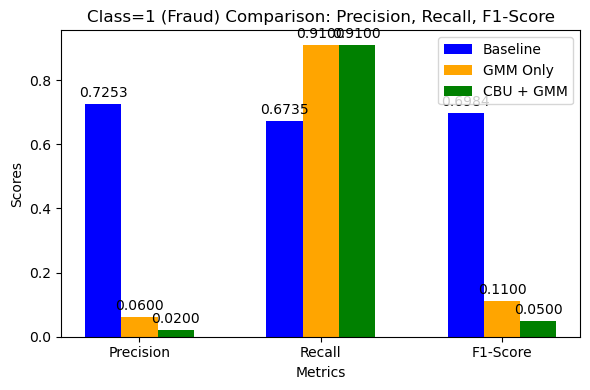

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4))

rects1 = ax.bar(x - width, baseline_values, width, label='Baseline', color='blue')
rects2 = ax.bar(x, gmm_values, width, label='GMM Only', color='orange')
rects3 = ax.bar(x + width, balanced_values, width, label='CBU + GMM', color='green')

ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Class=1 (Fraud) Comparison: Precision, Recall, F1-Score')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.4f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.tight_layout()
plt.show()

The comparative analysis shows trade-offs between precision and recall (we are focusing on minority). \
Baseline model achieves high precision, but moderate recall. Most predicted frauds are correct, but many actual frauds are missed. \

Both GMM-only and CBU+GMM sampled datasets increase the recall a lot. \
approx 0.91 \
The models are detecting almost every fraud case. \
But even if recall is increased, the precision drops drastically. \
This is reflected in the f-1 score as well. 

The comparison highlights that GMM-based oversampling effectively boosts the model's ability to identify the minority class, but at the expense of precision, which is a common trade-off in fraud detection tasks where catching frauds is prioritized over minimizing false alarms. Interestingly, the addition of CBU to reduce majority points does not significantly improve the metrics beyond GMM-only oversampling, suggesting that the GMM synthetic data is sufficient to enhance minority detection in this scenario.

### Final Recommendation

Based on the results of the analysis, GMM-based synthetic sampling is effective for enhancing the detection of the minority (fraud) class. Both the GMM-only and CBU + GMM approaches substantially increase recall, allowing the model to identify almost all fraudulent transactions, which is critical in a fraud detection context. While precision decreases significantly, leading to more false positives, this trade-off is often acceptable in practical scenarios where missing frauds is more costly than flagging legitimate transactions. Between the two methods, GMM-only oversampling is sufficient, as adding clustering-based undersampling of the majority class (CBU) does not noticeably improve performance metrics. Therefore, for this dataset, GMM-based oversampling is recommended as a practical approach for handling extreme class imbalance, especially when the goal is to maximize minority detection.